<a href="https://colab.research.google.com/github/SushantKumar-estech/Prediction-of-sales-revenue-using-mini-ANN/blob/master/Mini_ANN_to_predict_sales_revenue_with_Tensorflow_2_0_%2B_Python_with_Google%C2%A0Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP#0: Import Libraries

In [2]:
!pip uninstall -y tensorflow
!pip install tensorflow

Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 320.4MB 46kB/s 
     |████████████████████████████████| 6.8MB 40.3MB/s 
     |████████████████████████████████| 460kB 45.6MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0


In [4]:
import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt

## STEP #1: Import *Dataset*

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
sales_df = pd.read_csv('/content/drive/My Drive/ML_Dataset/Revenue Prediction/SalesData.csv')

In [14]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [15]:
sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [16]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [17]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## STEP #2: Visualization of Dataset

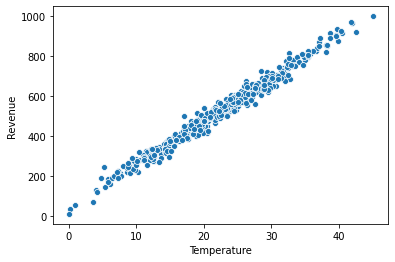

In [18]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue'])

## STEP #3: Creating Training & Testing Dataset

In [21]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

## STEP #4: Build & Train the Model

In [22]:
X_train.shape

(500,)

In [23]:
y_train.shape

(500,)

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 1, input_shape = [1]))
#model.add(tf.keras.layers.Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [27]:
epochs_hist = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 256776.7969
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 218982.0781
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 185079.9219
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 155123.8906
Epoch 5/1000
16/16 [==============================] - 0s 923us/step - loss: 129200.7422
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 106867.2422
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 87533.0234
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 71336.2109
Epoch 9/1000
16/16 [==============================] - 0s 894us/step - loss: 57447.4922
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 46102.6680
Epoch 11/1000
16/16 [==============================] - 0s 984us/step - loss: 36490.6289
Epoch 12/1000
16/16 [==============================

## STEP #5: Evaluating the Model

In [28]:
epochs_hist.history.keys()

dict_keys(['loss'])

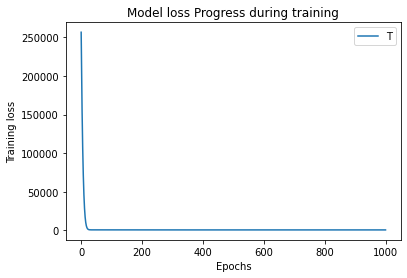

In [29]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()

In [30]:
model.get_weights()

[array([[21.404985]], dtype=float32), array([44.858368], dtype=float32)]

In [31]:
# Use the same model to perform predictions
Temperature = 5
Revenue = model.predict([Temperature])
print('Revenue Prediction using trained ANN=', Revenue)

Revenue Prediction using trained ANN= [[151.8833]]


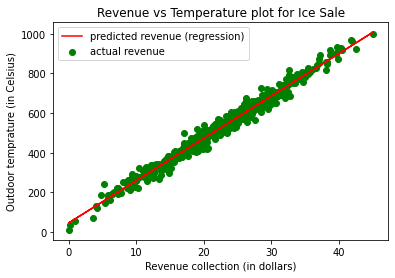

In [32]:
plt.scatter(X_train, y_train, color = 'g', label = 'actual revenue')
plt.plot(X_train, model.predict(X_train), color = 'r', label = 'predicted revenue (regression)')
plt.xlabel("Revenue collection (in dollars)")
plt.ylabel("Outdoor temprature (in Celsius)")
plt.title("Revenue vs Temperature plot for Ice Sale")
plt.legend()
plt.show()

## STEP #6 (Optional): Confirming the model using Regression Kit in Scikit learn! 

In [33]:
# making dataset in batch

X_train = X_train.values.reshape(-1,1)

In [34]:
X_train.shape

(500, 1)

In [35]:
y_train = y_train.values.reshape(-1,1)

In [36]:
y_train.shape

(500, 1)

In [37]:
from sklearn.linear_model import  LinearRegression

In [38]:
regressor = LinearRegression(fit_intercept= True) # asking LinearRegression to return the slope along with the Y-intercept
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_) 

Linear Model Coeff(m) [[21.44362551]]
Linear Model Coeff(b) [44.83126709]


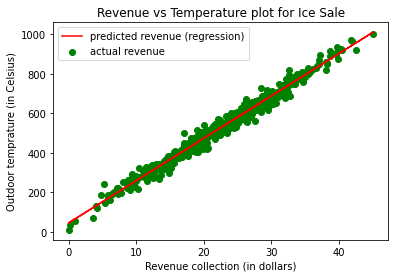

In [40]:
plt.scatter(X_train, y_train, color = 'g', label = 'actual revenue')
plt.plot(X_train, regressor.predict(X_train), color = 'r', label = 'predicted revenue (regression)')
plt.xlabel("Revenue collection (in dollars)")
plt.ylabel("Outdoor temprature (in Celsius)")
plt.title("Revenue vs Temperature plot for Ice Sale")
plt.legend()
plt.show()